# Inspection of dataset

In [76]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

## Import data

In [77]:
# define header
header_txt = ["unit_number","time_cycle", "setting_1", "setting_2", "setting_3",
              "sensor_1", "sensor_2", "sensor_3","sensor_4","sensor_5","sensor_6", "sensor_7", "sensor_8", "sensor_9", 
              "sensor_10", "sensor_11", "sensor_12", "sensor_13", "sensor_14", "sensor_15", "sensor_16", "sensor_17", 
              "sensor_18", "sensor_19", "sensor_20", "sensor_21"] 

### train_FD001

In [78]:
# import FD001 
df_train_FD001 = pd.read_csv("../CMAPSSdata/train_FD001.txt", sep=" ", header = None)
df_train_FD001=df_train_FD001.drop([26,27], axis=1) #remove empty columns
df_train_FD001.name = "train_FD001"
df_train_FD001.columns = header_txt #add header to datafile
df_train_FD001.head() 

,unit_number,time_cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


### Inspection of the dataset: train_FD001
- dimensions 
- number of units
- inspection of the provided time cycles
    * get max value of time cycles (represents end of live RUL=0)
    * plot distribution of max time cycles over all units

In [79]:
print("The data set train_FD001 has", df_train_FD001.shape[0],"rows and",df_train_FD001.shape[1], "columns.") #print dimensions

no_units_train_FD001 = max(df_train_FD001["unit_number"]); # print number of units
print("The data set train_FD001 has",no_units_train_FD001 ,"test observations / units." )

The data set train_FD001 has 20631 rows and 26 columns.
The data set train_FD001 has 100 test observations / units.


max time cycle per unit: 
  unit_number
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: time_cycle, Length: 100, dtype: int64


Text(0, 0.5, 'number of units')

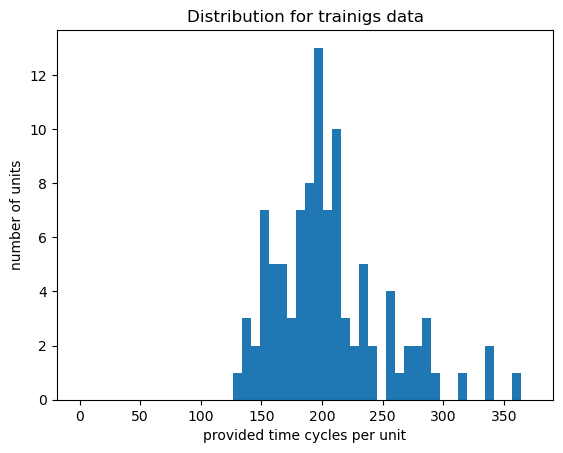

In [80]:
# define time to failure as max_time_cycles
curr_dataSet = df_train_FD001 # choose dataset

max_time_cycle = curr_dataSet.groupby("unit_number")["time_cycle"].max() # compute maximum time cycle for each unit
print("max time cycle per unit: \n " ,max_time_cycle) 

# show histogram of max_time_cycles
plt.hist(max_time_cycle, bins=50, range=(0,(max_time_cycle.max()+10)))
plt.title("Distribution for trainigs data")
plt.xlabel("provided time cycles per unit")
plt.ylabel("number of units")

### test_FD001

In [87]:
## import test_FD001 
df_test_FD001 = pd.read_csv("../CMAPSSdata/test_FD001.txt", sep=" ", header = None)
df_test_FD001=df_test_FD001.drop([26,27], axis=1) # remove empty columns
df_test_FD001.name = "test_FD001"
df_test_FD001.columns = header_txt # add header to datafile
df_test_FD001.head()

,unit_number,time_cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


### Inspection of the dataset: test_FD001
- dimensions 
- number of units
- inspection of the provided time cycles
    * get max value of time cycles (represents end of testing prior failure)
    * plot distribution of max time cycles over all units

In [82]:
print("The data set train_FD001 has", df_test_FD001.shape[0],"rows and",df_test_FD001.shape[1], "columns.") # print dimensions
no_units_test_FD001 = max(df_test_FD001["unit_number"]);
print("The data set train_FD001 has",no_units_test_FD001 ,"test observations / units." ) # print number of units

The data set train_FD001 has 13096 rows and 26 columns.
The data set train_FD001 has 100 test observations / units.


In [83]:
# max time value represents end of testing prior failure
curr_dataSet = df_test_FD001 # choose dataset
max_time_cycle_test = curr_dataSet.groupby("unit_number")["time_cycle"].max() #  cycle times per unit
print(max_time_cycle_test)

## opt: determine units that are below a threshold value to sort out short test runs 
#max_time_cycle_test_remove  = max_time_cycle_test< 60
#units_to_drop = max_time_cycle_test_remove[max_time_cycle_test_remove==True].index   # remove all units with provided time cycles less than 60 cycles
#print("Following units are dropped: ",units_to_drop.values)
#for u in units_to_drop:
#     df_test_FD001.drop(df_test_FD001[df_test_FD001['unit_number'] == u].index, inplace = True)
## opt end

# df_test_FD001.to_csv('remaining_dataframe.csv', index=False) # save 

unit_number
1       31
2       49
3      126
4      106
5       98
      ... 
96      97
97     134
98     121
99      97
100    198
Name: time_cycle, Length: 100, dtype: int64


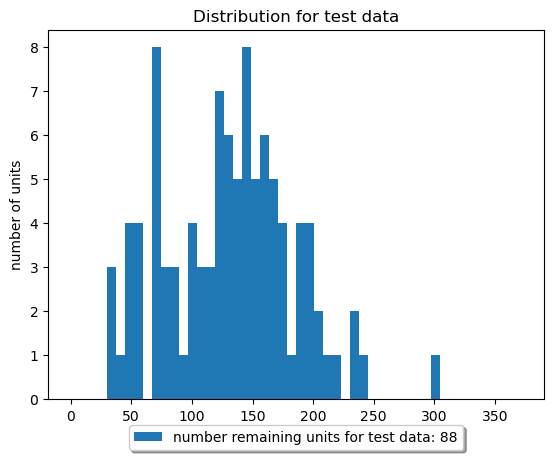

In [84]:
# show histogram of max_time_cycles
plt.figure
plt.hist(df_test_FD001.groupby("unit_number")["time_cycle"].max(), bins=50, range=(0,(max_time_cycle.max()+10)), label = "number remaining units for test data: %.f" %(len(max_time_cycle_test_remove) - sum(max_time_cycle_test_remove)))
#plt.hist(max_time_cycle_test[max_time_cycle_test_remove], bins=50, range=(0,(max_time_cycle.max()+10)), label = "number dropped units: %.f" %(sum(max_time_cycle_test_remove))) # units
plt.title("Distribution for test data")
plt.xlabel("provided time cycles per unit")
plt.ylabel("number of units")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True)

# Plot Signals

In [88]:
# Check for missing data

def checkOutlier(curr_dataSet):
    print("Check for missing data for", curr_dataSet.name, ":")
    no_rows =curr_dataSet.count(axis=0)
    if len(no_rows[no_rows != len(curr_dataSet)]) > 0: 
        print("ATTENTION: Inconsistent number of rows:", no_rows[no_rows != len(curr_dataSet)] )
    else :
        print("All columns have same length.")
    
    if curr_dataSet.isnull().values.any(): #ckeck missing values
        print("ATTENTION: Some values might be missing.\n")
    else:
        print("No missing values (isnull) detected!\n")

In [89]:
checkOutlier(df_train_FD001)
checkOutlier(df_test_FD001)

Check for missing data for train_FD001 :
All columns have same length.
No missing values (isnull) detected!

Check for missing data for test_FD001 :
All columns have same length.
No missing values (isnull) detected!



In [92]:
# evaluate non changing signals by standard deviation 
# No changing signals - std = 0 
def checkStdCloseZero(curr_dataSet):
    print(curr_dataSet.name, ": Standard deviation close to zero for " ,curr_dataSet.columns[np.isclose(curr_dataSet.std(axis=0), 0, rtol=1e-05, atol=1e-08, equal_nan=False)].values)

In [94]:
checkStdCloseZero(df_train_FD001)
checkStdCloseZero(df_test_FD001)

train_FD001 : Standard deviation close to zero for  ['setting_3' 'sensor_1' 'sensor_5' 'sensor_10' 'sensor_16' 'sensor_18'
 'sensor_19']
test_FD001 : Standard deviation close to zero for  ['setting_3' 'sensor_1' 'sensor_5' 'sensor_10' 'sensor_16' 'sensor_18'
 'sensor_19']


In [95]:
# Visualization of operating settings
def plotSettings(curr_dataSet, unitNumber):
    for i in range(1,4):
        plt.figure(i)
        plt.xlabel("time_cycle")
        plt.ylabel("operation setting %.f" %i)
        
        for j in unitNumber: # unit
            plt.plot(curr_dataSet[curr_dataSet["unit_number"]==j]["time_cycle"],curr_dataSet[curr_dataSet["unit_number"]==j]["setting_"+str(i)].rolling(window=30).mean(), label = j)
        plt.legend()

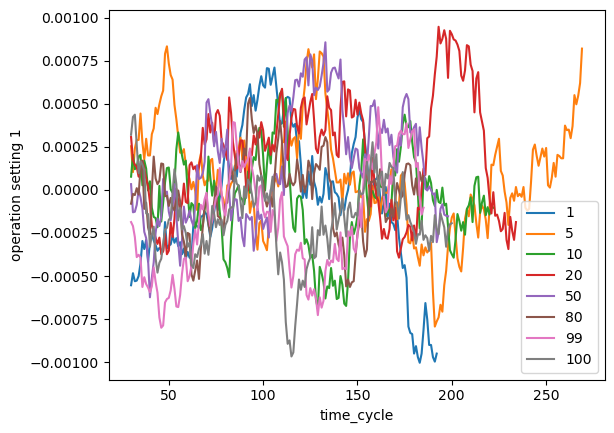

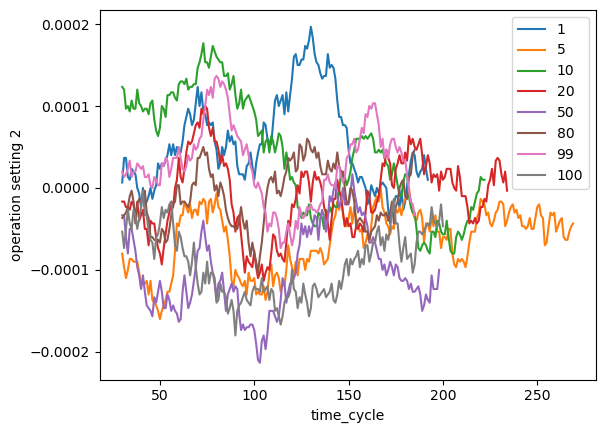

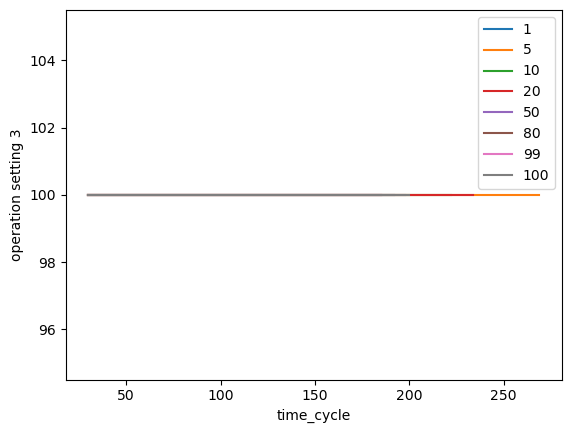

In [99]:
plotSettings(df_train_FD001,unitNumber=[1,5,10,20,50,80,99,100])
#plotSettings(df_test_FD001,unitNumber=[1,5,10,20,50,80,99,100])

In [100]:
# Visualization of measurement signals
# plot measurement singals for sensor number [s1, s2, ...] and unit (array) of data_Set
def plotSensor(curr_dataSet,sensorID, unitNumber):
    for i in sensorID: # number of sensor
        plt.figure(i)
        plt.ylabel("sensor measurement %.f" %i)
        plt.xlabel("time")
        for j in unitNumber: # unit
            plt.plot(curr_dataSet[curr_dataSet["unit_number"]==j]["time_cycle"], curr_dataSet[curr_dataSet["unit_number"]==j]["sensor_"+str(i)], label=j)
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=10)
        #plt.ylim(min(curr_dataSet[curr_dataSet["unit_number"]==j]["sensor_"+str(i)]), max(curr_dataSet[curr_dataSet["unit_number"]==j]["sensor_"+str(i)]))

C:\Users\franz\AppData\Local\Temp\ipykernel_15384\3884065533.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


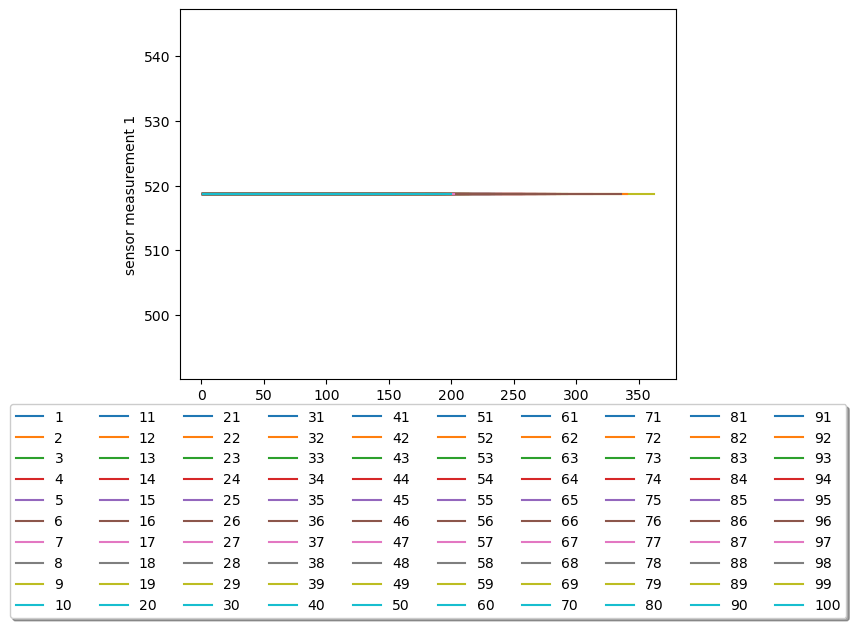

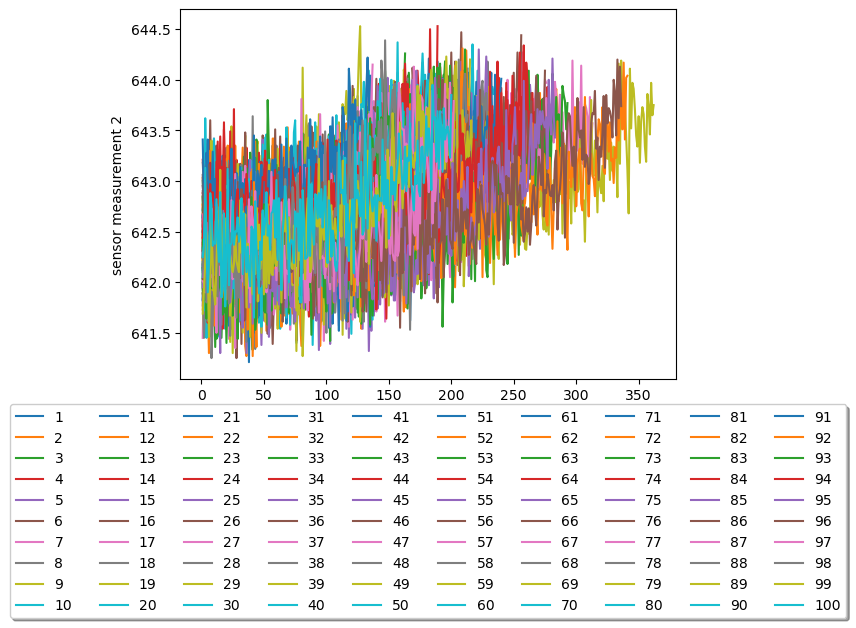

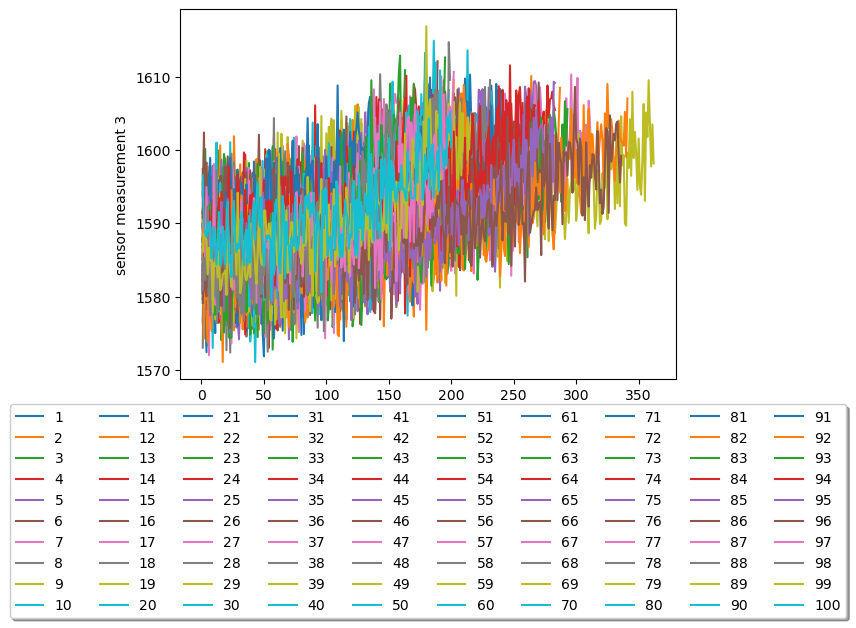

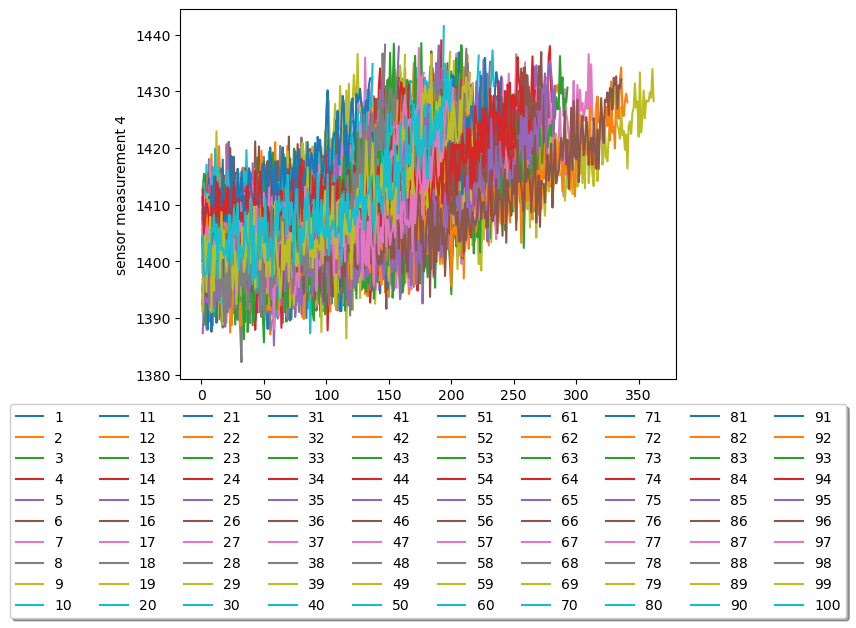

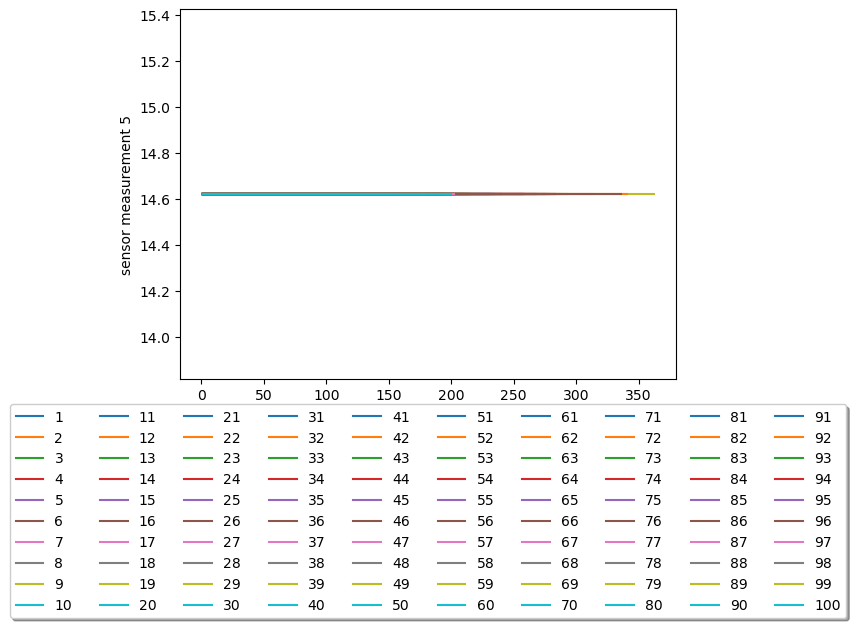

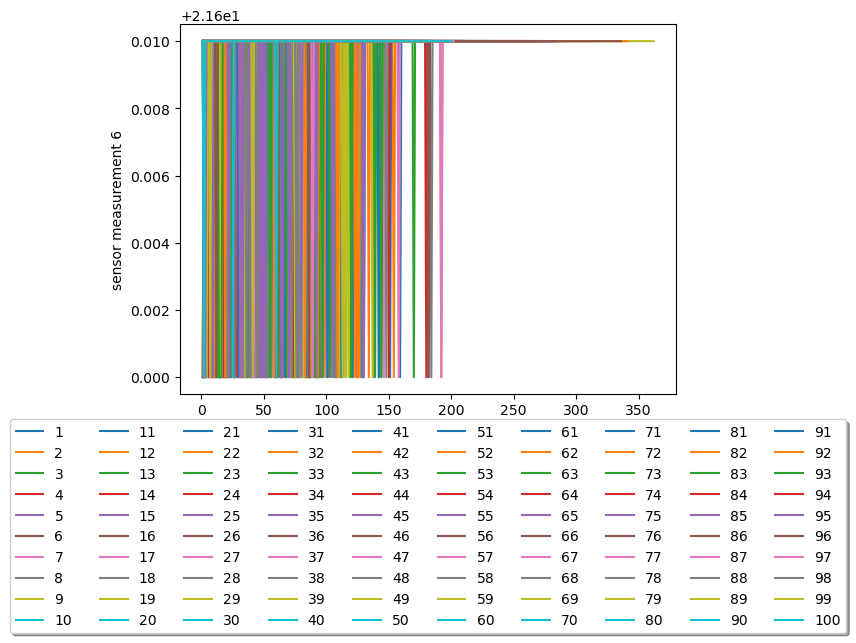

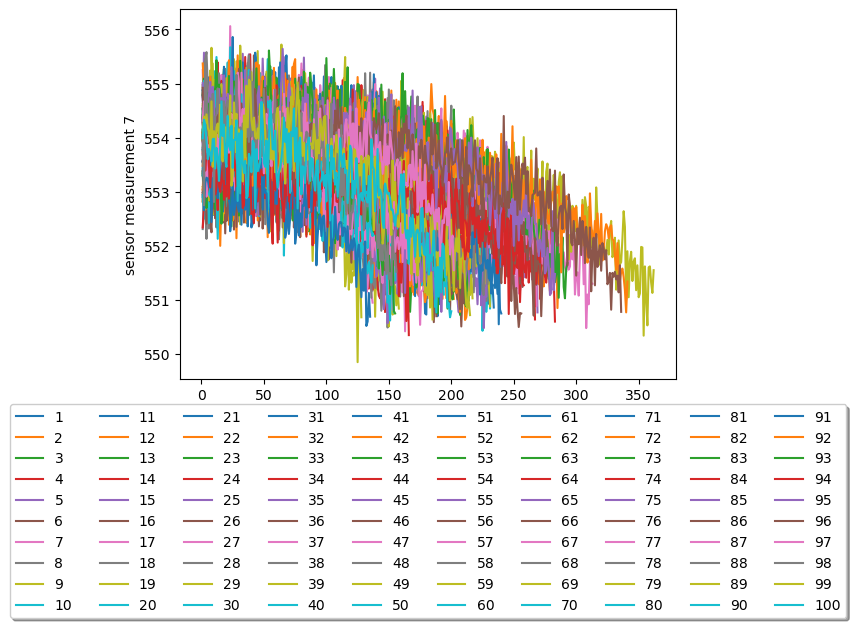

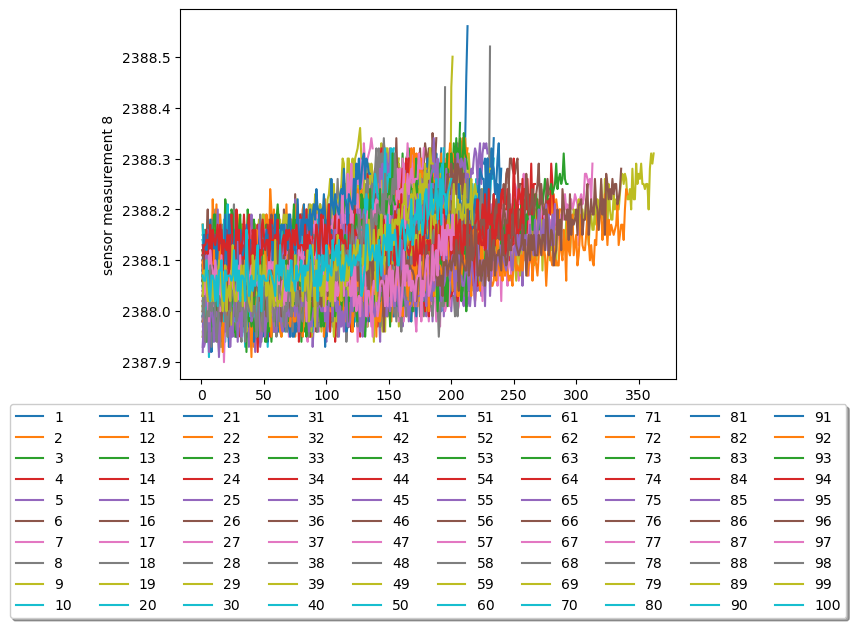

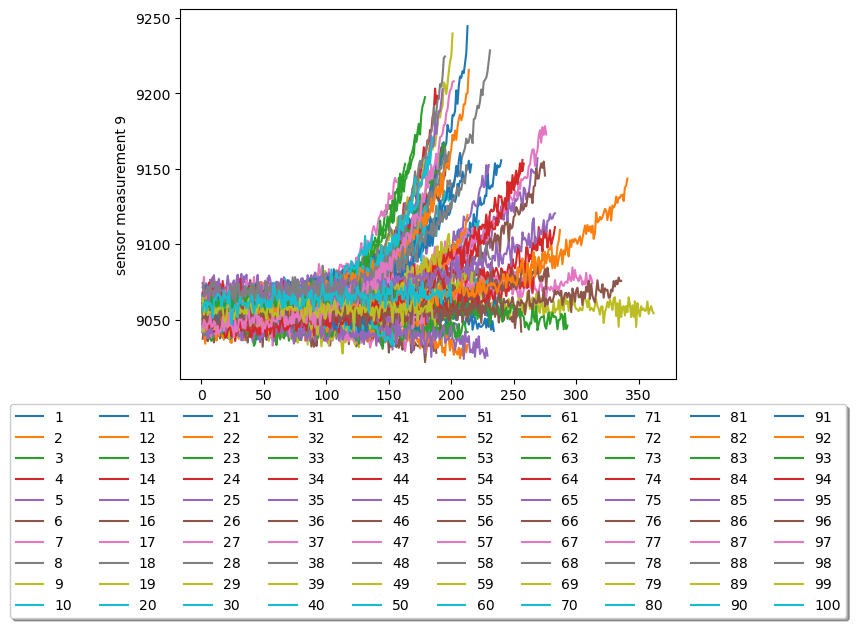

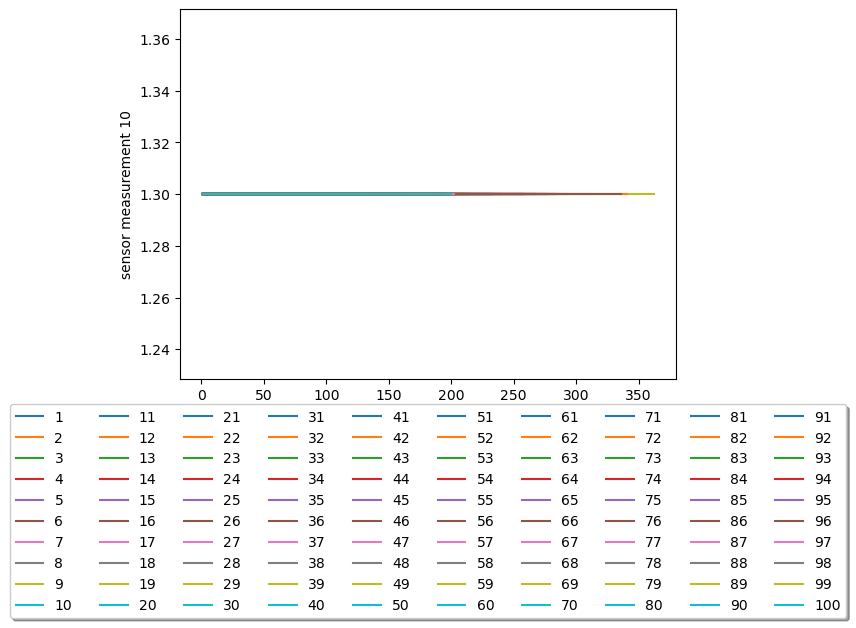

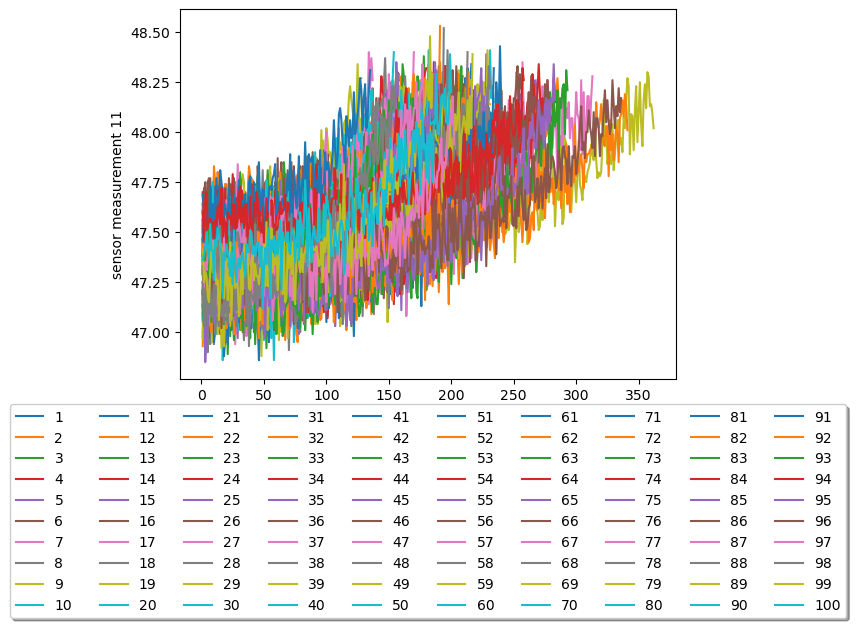

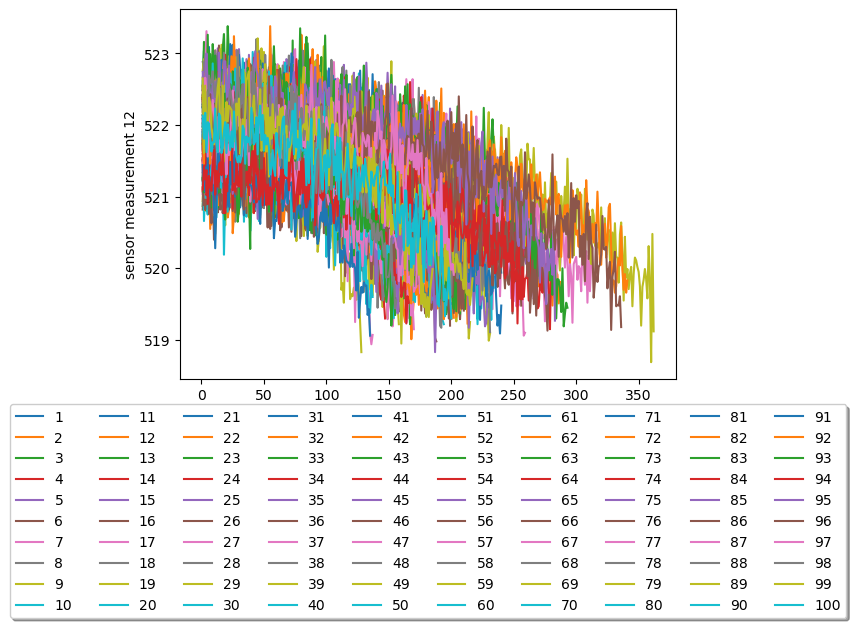

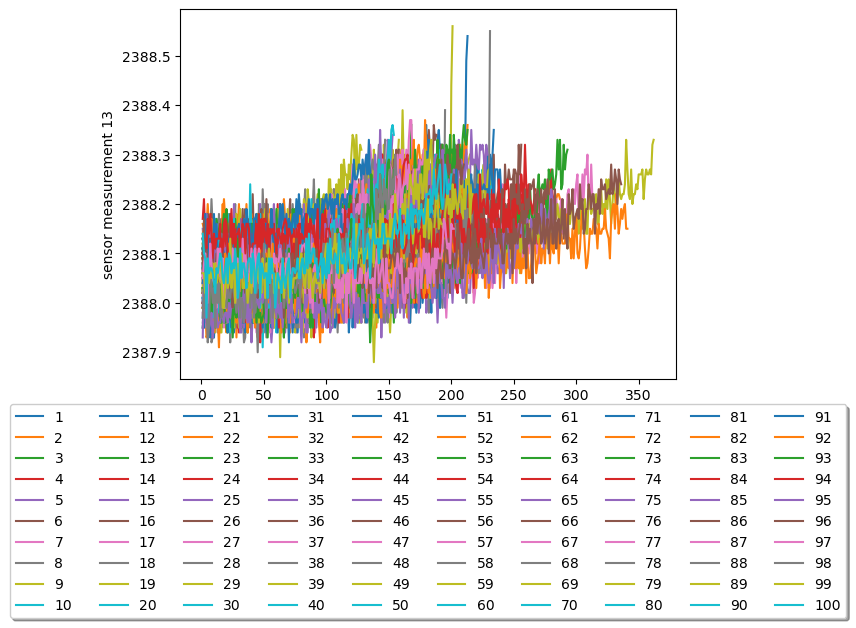

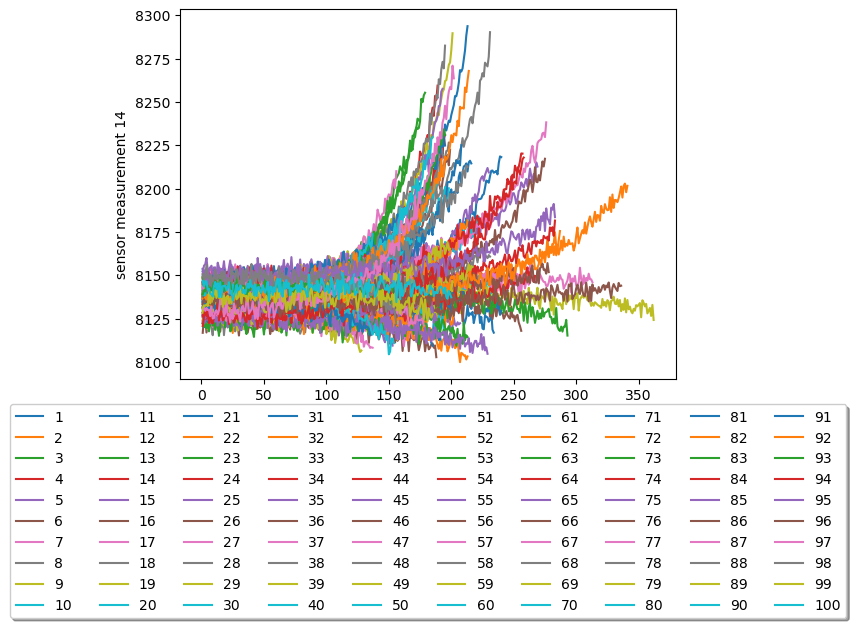

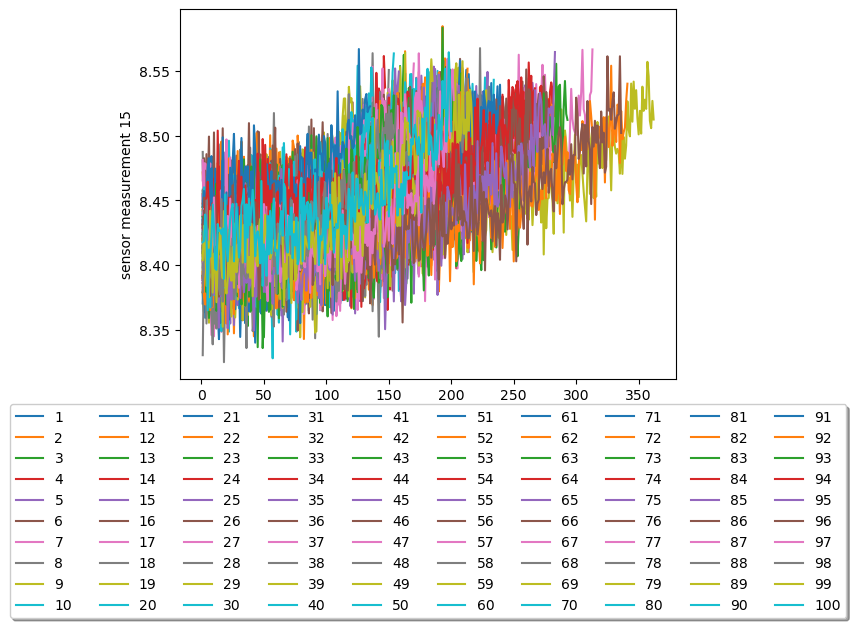

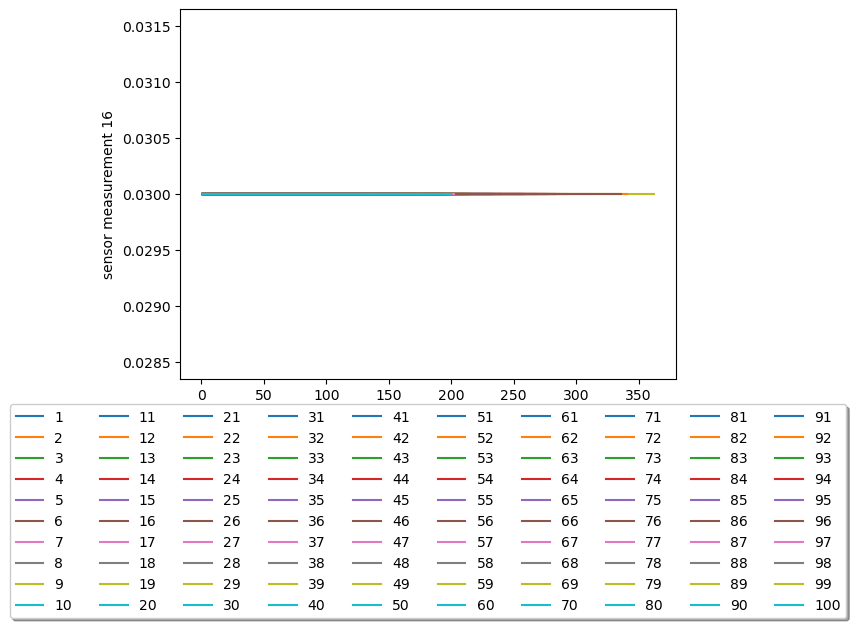

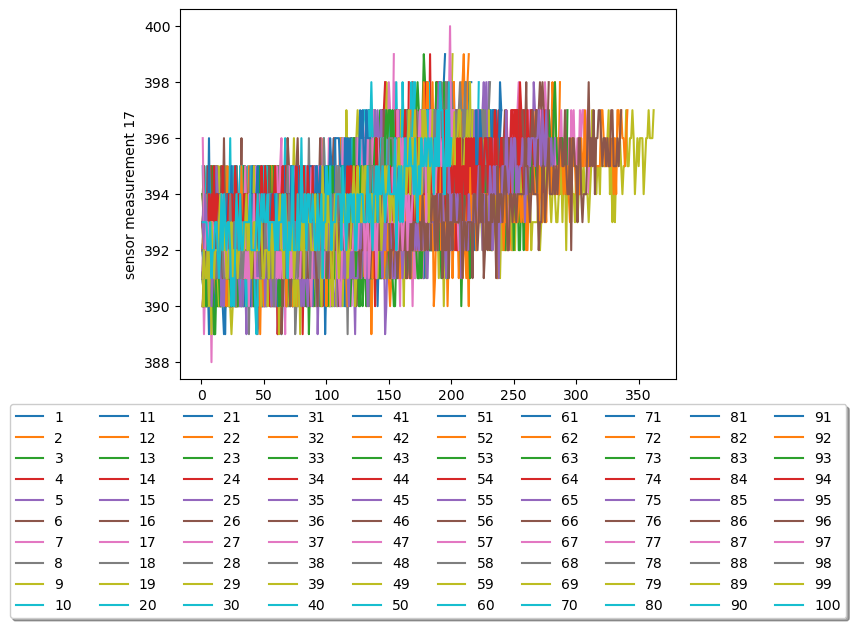

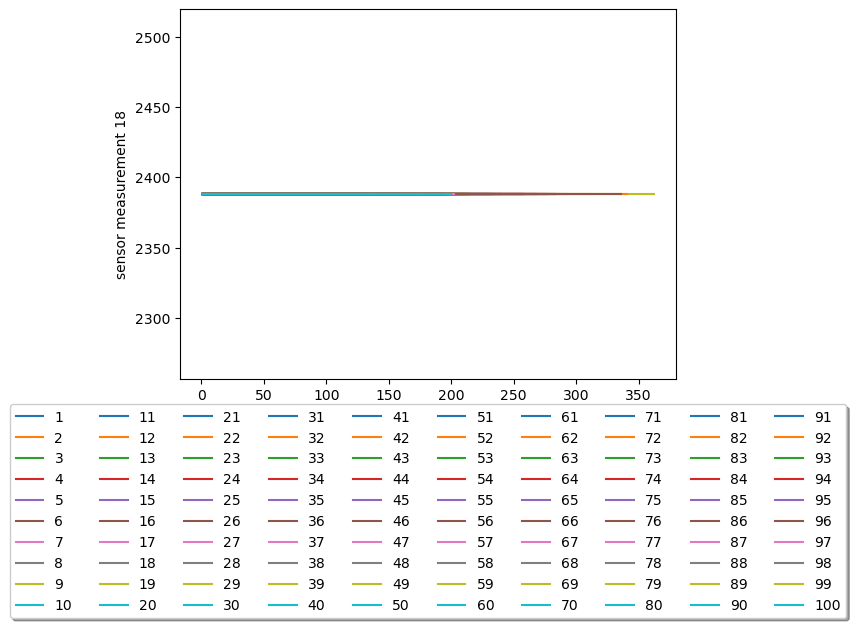

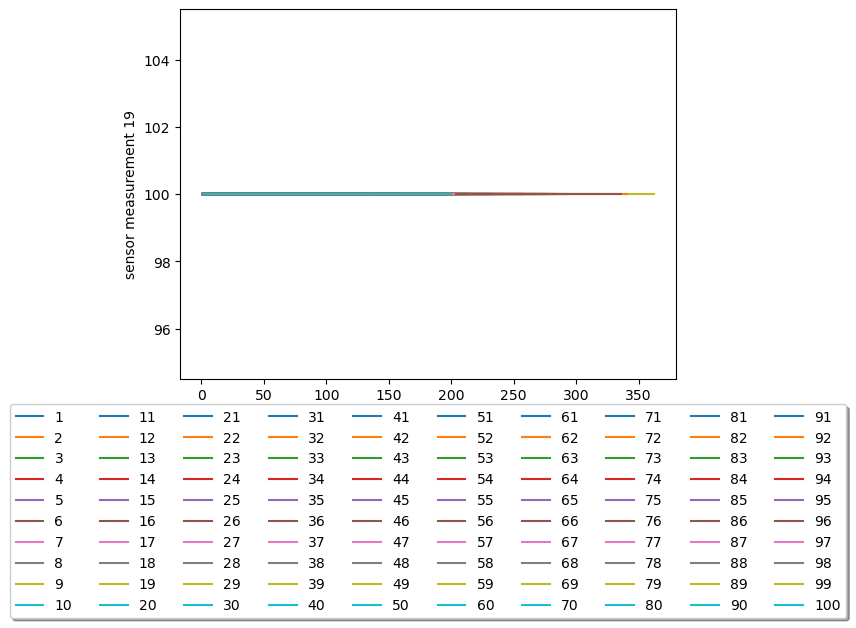

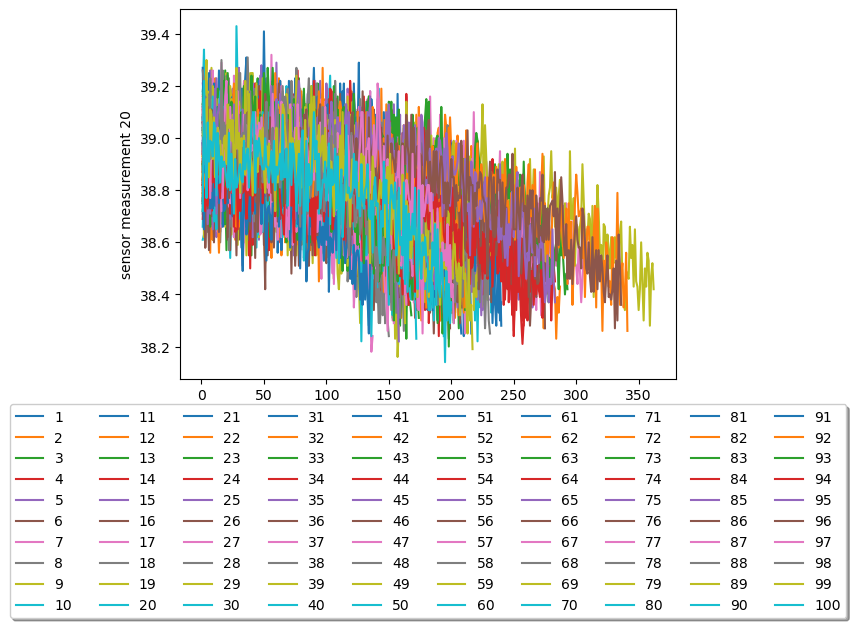

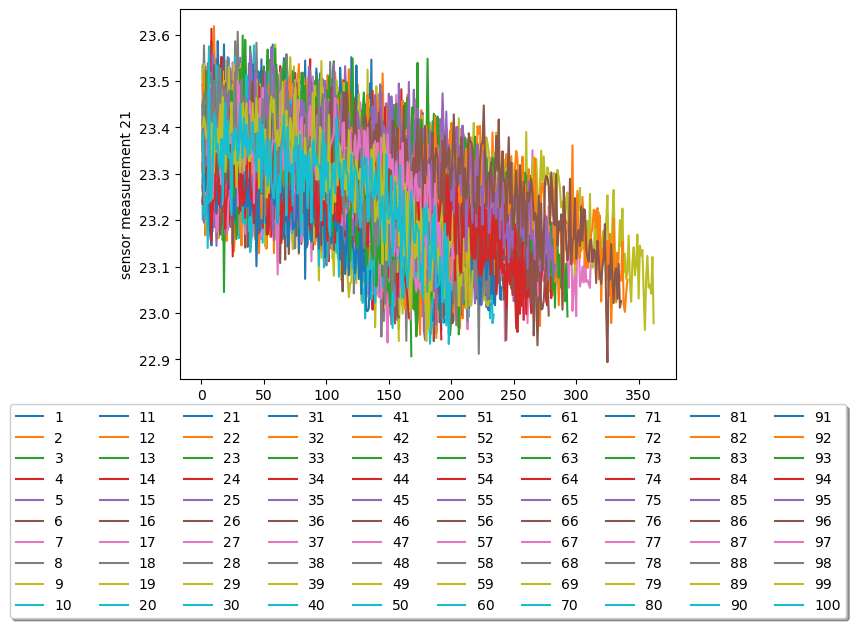

In [101]:
plotSensor(df_train_FD001, sensorID=range(1,22), unitNumber=range(1,101)) 

## Inspection of correlation

In [104]:
# Plot correlation matrix of "sensor measurements" 
# input: curr_dataSet = FD00x; unitNumber = 1-xxx

def mapSensorCorr(curr_dataSet,unitNumber):
    # source: https://thomas-berweger.medium.com/sdfsdf-3678cd946bd0
    plt.figure
    sns.heatmap(curr_dataSet[curr_dataSet["unit_number"]==unitNumber].iloc[:,5:].corr(), cmap='coolwarm', linecolor='white',linewidths=1, annot=True)
    plt.title("Correlation of signal measurements "+str(curr_dataSet.name)+ " unit "+str(unitNumber))
    plt.show()

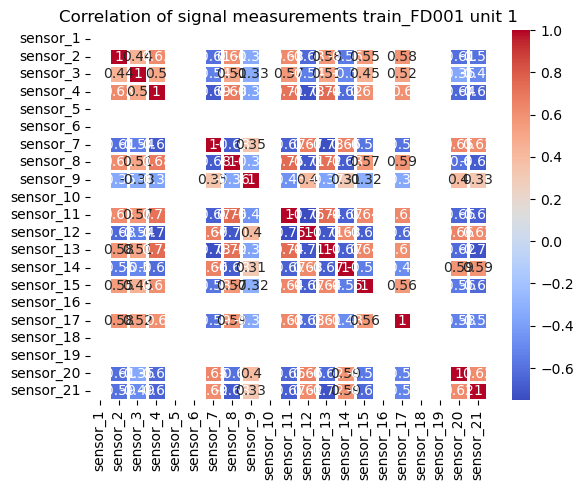

In [105]:
mapSensorCorr(df_train_FD001,1)

In [115]:
# https://stackoverflow.com/questions/39409866/correlation-heatmap
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

def mapSensorCorr2(curr_dataSet,unitNumber):
     cmap = sns.diverging_palette(5, 250, as_cmap=True)
     corr = curr_dataSet[curr_dataSet["unit_number"]==unitNumber].iloc[:,5:].corr()
     return corr.style.background_gradient(cmap, axis=1)\
     .format(precision=3)\
     .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
     .set_caption("Correlation of "+ str(curr_dataSet.name)+ "\n unit"+str(unitNumber))\
     .set_table_styles(magnify())
     


In [116]:
mapSensorCorr2(df_train_FD001,1)

c:\Users\franz\anaconda3\lib\site-packages\pandas\io\formats\style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Users\franz\anaconda3\lib\site-packages\pandas\io\formats\style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
sensor_1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sensor_2,nan,1.000,0.534,0.715,nan,nan,-0.689,0.725,-0.379,nan,0.709,-0.709,0.693,-0.650,0.637,nan,0.648,nan,nan,-0.689,-0.675
sensor_3,nan,0.534,1.000,0.600,nan,nan,-0.612,0.618,-0.342,nan,0.646,-0.631,0.613,-0.593,0.545,nan,0.546,nan,nan,-0.471,-0.584
sensor_4,nan,0.715,0.600,1.000,nan,nan,-0.799,0.815,-0.426,nan,0.817,-0.838,0.819,-0.757,0.728,nan,0.691,nan,nan,-0.722,-0.745
sensor_5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sensor_6,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
sensor_7,nan,-0.689,-0.612,-0.799,nan,nan,1.000,-0.809,0.402,nan,-0.793,0.787,-0.829,0.759,-0.705,nan,-0.656,nan,nan,0.745,0.709
sensor_8,nan,0.725,0.618,0.815,nan,nan,-0.809,1.000,-0.459,nan,0.849,-0.827,0.826,-0.789,0.717,nan,0.684,nan,nan,-0.716,-0.761
sensor_9,nan,-0.379,-0.342,-0.426,nan,nan,0.402,-0.459,1.000,nan,-0.506,0.467,-0.446,0.400,-0.390,nan,-0.393,nan,nan,0.434,0.409
sensor_10,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


# Feature Selection

## PCA
Preform PCA and generate Screeplot 

Due to the Screeplot over 70 % of the variance can be explained by PC1 and PC2.

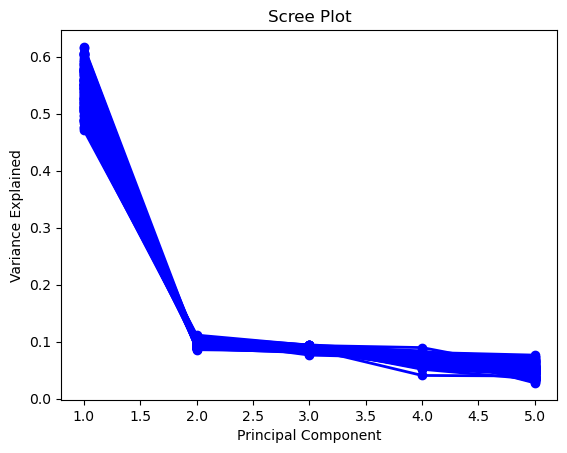

In [110]:
# Compute 
# quelle https://statologie.de/scree-diagramm-python/

unit_number = 1
curr_dataSet = df_train_FD001
scaler = StandardScaler()
# Standardise data (copy)
scaled_df = curr_dataSet[curr_dataSet["unit_number"]==1].iloc[:,[1,2,3,6,7,8,10,11,12,13,14,16,19,20]].copy() # work with copy of data set
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

PC_values = []
plt.figure()
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
expl_variance_ratio_over_units = []
loadings = np.zeros((14,5))

i = 1
for i in range(1,101): # unit_number
    scaled_df = curr_dataSet[curr_dataSet["unit_number"]==i].iloc[:,[1,2,3,6,7,8,10,11,12,13,14,16,19,20]].copy()
    scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)
    pca = PCA(n_components=5)
    pca_fit = pca.fit(scaled_df)
    PC_values = (np.arange(pca.n_components_) + 1)
    plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
    expl_variance_ratio_over_units.append(pca.explained_variance_ratio_)
    curr_loadings = (pca.components_.T * np.sqrt(pca.explained_variance_))>0.5 # check if loading is high, then add +1 to loadings array
    loadings = loadings + curr_loadings.astype(int)

## Compute loadings
To reduce the number of input features the results of the PCA are used to calculate the loadings of each sensor on the respective principal component PCi. Only the signals with loadings on PC1 and PC2 are selected as features.

In [111]:
# generate loadings matrix: matrix show number of units that have a high loading (~ correlation) (loading > 0.5) on the respective principal component PCi
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3', 'PC4','PC5'], 
                              index=["sensor_2", "sensor_3","sensor_4", "sensor_7", "sensor_8",
              "sensor_9", "sensor_11", "sensor_12", "sensor_13", "sensor_14", "sensor_15", "sensor_17" ,"sensor_20", "sensor_21"])
print(loading_matrix) 

             PC1   PC2   PC3   PC4   PC5
sensor_2   100.0   0.0   0.0   0.0   0.0
sensor_3     0.0  36.0  19.0  22.0   1.0
sensor_4     0.0  34.0  27.0  16.0   1.0
sensor_7   100.0   0.0   0.0   2.0   9.0
sensor_8   100.0   0.0   0.0   2.0  21.0
sensor_9   100.0   0.0   0.0   0.0   0.0
sensor_11    0.0   0.0   0.0   0.0   0.0
sensor_12    0.0   0.0   0.0   0.0   0.0
sensor_13   91.0   1.0   1.0   3.0  10.0
sensor_14   61.0   3.0   2.0  15.0  15.0
sensor_15    0.0   0.0   0.0   0.0   0.0
sensor_17    0.0   0.0   0.0   0.0   0.0
sensor_20  100.0   0.0   0.0   0.0   2.0
sensor_21    0.0   0.0   0.0   0.0   0.0


In [113]:
#print(expl_variance_ratio_over_units)

[array([0.57500923, 0.10018548, 0.08298442, 0.06727285, 0.04746054]), array([0.61534911, 0.0884547 , 0.08224481, 0.07879302, 0.02736679]), array([0.55039111, 0.0934366 , 0.08302677, 0.07714734, 0.0448601 ]), array([0.51457082, 0.09631465, 0.08486824, 0.07943978, 0.05570356]), array([0.60688918, 0.09035051, 0.08320841, 0.07516439, 0.02915021]), array([0.55143027, 0.09910446, 0.08920621, 0.05858752, 0.04460898]), array([0.55227023, 0.08916583, 0.08360829, 0.07828646, 0.06183267]), array([0.49009061, 0.10804001, 0.09394783, 0.07347954, 0.0510539 ]), array([0.54279467, 0.08844394, 0.08404814, 0.07727505, 0.04970786]), array([0.60225619, 0.08719332, 0.08087473, 0.07904022, 0.03681919]), array([0.57450635, 0.09336323, 0.08384496, 0.07563355, 0.03635466]), array([0.50859007, 0.10306407, 0.09100409, 0.07394453, 0.05848816]), array([0.54464401, 0.10268281, 0.08146414, 0.06183813, 0.04973016]), array([0.56084139, 0.0970231 , 0.08915185, 0.05910947, 0.0454459 ]), array([0.58143801, 0.10245933, 0.

# Results
Following sensor readings are choosen as input features for the model:
2, 3, 4, 7, 8, 9, 13, 14, 20